## Feature Engineering and Modeling

## Import Necessary Libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

### Load the dataset

In [9]:
df = pd.read_csv('E:/data06/data.csv')

### Feature Aggregations

In [10]:
print("Descriptions of Transaction Amount")
aggregate_df = df.groupby('CustomerId').agg(
    Total_tran_amt=('Amount', 'sum'),
    Average_tran_amt=('Amount', 'mean'),
    Tran_count=('TransactionId', 'count'),
    STD_tran_amt=('Amount', 'std')
).reset_index()

print(aggregate_df.head())

Descriptions of Transaction Amount
        CustomerId  Total_tran_amt  Average_tran_amt  Tran_count  STD_tran_amt
0     CustomerId_1        -10000.0     -10000.000000           1           NaN
1    CustomerId_10        -10000.0     -10000.000000           1           NaN
2  CustomerId_1001         20000.0       4000.000000           5   6558.963333
3  CustomerId_1002          4225.0        384.090909          11    560.498966
4  CustomerId_1003         20000.0       3333.333333           6   6030.478146


In [11]:
# Convert 'TransactionStartTime' to datetime if it's not in that format
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract hour, day, month, and year
df['Transaction_hour'] = df['TransactionStartTime'].dt.hour
df['Transaction_day'] = df['TransactionStartTime'].dt.day
df['Transaction_month'] = df['TransactionStartTime'].dt.month
df['Transaction_year'] = df['TransactionStartTime'].dt.year

print(df[['Transaction_hour', 'Transaction_day', 'Transaction_month', 'Transaction_year']].head())


   Transaction_hour  Transaction_day  Transaction_month  Transaction_year
0                 2               15                 11              2018
1                 2               15                 11              2018
2                 2               15                 11              2018
3                 3               15                 11              2018
4                 3               15                 11              2018


### Encoding - Categorical Variables

In [12]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['CurrencyCode', 'ProviderId', 'ProductCategory', 'ChannelId'], drop_first=True)
print(df_encoded.head())


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId  CountryCode     ProductId   Amount  Value  \
0  CustomerId_4406          256  ProductId_10   1000.0   1000   
1  CustomerId_4406          256   ProductId_6    -20.0     20   
2  CustomerId_4683          256   ProductId_1    500.0    500   
3   CustomerId_988          256  ProductId_21  20000.0  21800   
4   CustomerId_988          256   ProductId_6   -644.0    644   

       TransactionStartTime  ...  ProductCategory_financial_services  \
0 2018-11-15 02:18:49+00:00  ...                              

### Preprocessing
Missing Values Handling

In [14]:
# Impute missing values with the mean for numerical columns only
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

In [15]:
# Remove rows with missing values
df.dropna(inplace=True)

Scaling or Normalizations

In [16]:
scaler = MinMaxScaler()
df[['Amount_normalized', 'Value_normalized']] = scaler.fit_transform(df[['Amount', 'Value']])

In [17]:
scaler = StandardScaler()
df[['Amount_standardized', 'Value_standardized']] = scaler.fit_transform(df[['Amount', 'Value']])
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Transaction_hour,Transaction_day,Transaction_month,Transaction_year,Amount_normalized,Value_normalized,Amount_standardized,Value_standardized
0,78150,46980,2490,3535,2584,UGX,256,ProviderId_6,1,airtime,...,2,0,2,15,11,2018,0.092004,0.000101,-0.046371,-0.072291
1,75821,31755,3219,2366,2584,UGX,256,ProviderId_4,19,financial_services,...,2,0,2,15,11,2018,0.091910,0.000002,-0.054643,-0.080251
2,39888,60272,2713,996,2806,UGX,256,ProviderId_6,0,airtime,...,2,0,2,15,11,2018,0.091958,0.000050,-0.050426,-0.076352
3,48738,1797,3351,974,3733,UGX,256,ProviderId_1,11,utility_bill,...,2,0,3,15,11,2018,0.093750,0.002206,0.107717,0.096648
4,41364,48941,3219,2366,3733,UGX,256,ProviderId_4,19,financial_services,...,2,0,3,15,11,2018,0.091853,0.000065,-0.059704,-0.075183


In [18]:
scaler = StandardScaler()
df[['Amount_standardized', 'Value_standardized']] = scaler.fit_transform(df[['Amount', 'Value']])
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Transaction_hour,Transaction_day,Transaction_month,Transaction_year,Amount_normalized,Value_normalized,Amount_standardized,Value_standardized
0,78150,46980,2490,3535,2584,UGX,256,ProviderId_6,1,airtime,...,2,0,2,15,11,2018,0.092004,0.000101,-0.046371,-0.072291
1,75821,31755,3219,2366,2584,UGX,256,ProviderId_4,19,financial_services,...,2,0,2,15,11,2018,0.091910,0.000002,-0.054643,-0.080251
2,39888,60272,2713,996,2806,UGX,256,ProviderId_6,0,airtime,...,2,0,2,15,11,2018,0.091958,0.000050,-0.050426,-0.076352
3,48738,1797,3351,974,3733,UGX,256,ProviderId_1,11,utility_bill,...,2,0,3,15,11,2018,0.093750,0.002206,0.107717,0.096648
4,41364,48941,3219,2366,3733,UGX,256,ProviderId_4,19,financial_services,...,2,0,3,15,11,2018,0.091853,0.000065,-0.059704,-0.075183


In [19]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime']).dt.tz_localize(None)

In [20]:
# Calculate RFMS scores for each user
rfms_scores = df.groupby('CustomerId').agg(
    Recency=('TransactionStartTime', lambda x: (pd.Timestamp.now() - x.max()).days),
    Frequency=('TransactionId', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()

# Display the first few rows of RFMS scores
rfms_scores.head()

,CustomerId,Recency,Frequency,Monetary
0,0,2259,1,-10000.0
1,1,2259,1,-10000.0
2,2,2264,5,20000.0
3,3,2201,11,4225.0
4,4,2187,6,20000.0


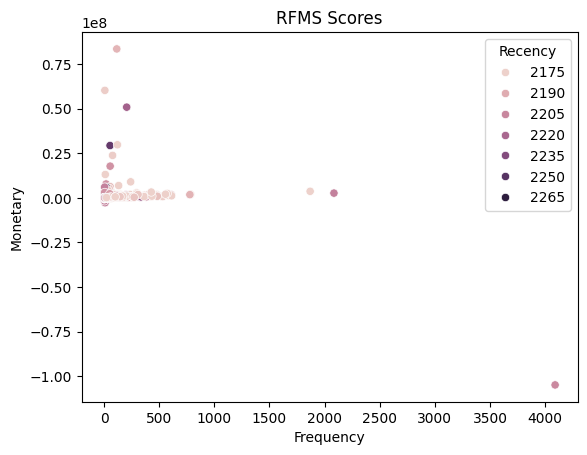

In [21]:
# Visualize RFMS scores
%matplotlib inline

import matplotlib.pyplot as plt

plt.ion()  # Turn on interactive mode

# Your plotting code
##plt.figure(figsize=(12, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Recency', data=rfms_scores)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('RFMS Scores')
plt.show()

Labeling --> Good or Bad

In [22]:
high_freq_boundary = rfms_scores['Frequency'].quantile(0.75)
high_monetary_boundary = rfms_scores['Monetary'].quantile(0.75)
low_recency_boundary = rfms_scores['Recency'].quantile(0.25)

# Assign labels based on boundary
rfms_scores['Label'] = 'Good'
rfms_scores.loc[(rfms_scores['Frequency'] <= high_freq_boundary) & 
                (rfms_scores['Monetary'] <= high_monetary_boundary) & 
                (rfms_scores['Recency'] >= low_recency_boundary), 'Label'] = 'Bad'

rfms_scores

,CustomerId,Recency,Frequency,Monetary,Label
0,0,2259,1,-10000.0,Bad
1,1,2259,1,-10000.0,Bad
2,2,2264,5,20000.0,Bad
3,3,2201,11,4225.0,Bad
4,4,2187,6,20000.0,Bad
...,...,...,...,...,...
3737,3737,2180,6,20000.0,Bad
3738,3738,2201,5,20000.0,Bad
3739,3739,2176,101,543873.0,Good
3740,3740,2243,17,139000.0,Good


Perform WoE Binning

In [23]:
def calculate_woe_iv(data, feature, target):
    # Initialize list to store WoE and IV values
    lst = []
    
    # Loop through each unique category
    for i in range(data[feature].nunique()):
        val = list(data[feature].unique())[i]
        df = data[data[feature] == val]
        good = len(df[df[target] == 0])
        bad = len(df[df[target] == 1])
        lst.append([val, good, bad])
    
    # Create a DataFrame to hold WoE and IV values
    woe_df = pd.DataFrame(lst, columns=[feature, 'Good', 'Bad'])
    woe_df['Distr_Good'] = woe_df['Good'] / woe_df['Good'].sum()
    woe_df['Distr_Bad'] = woe_df['Bad'] / woe_df['Bad'].sum()
    woe_df['WoE'] = np.log(woe_df['Distr_Good'] / woe_df['Distr_Bad'])
    woe_df['IV'] = (woe_df['Distr_Good'] - woe_df['Distr_Bad']) * woe_df['WoE']
    
    # Calculate total Information Value
    iv = woe_df['IV'].sum()
    
    return woe_df, iv

woe_df, iv = calculate_woe_iv(df, 'ProductCategory', 'FraudResult')
print(woe_df)
print(f'Total IV for ProductCategory: {iv}')

      ProductCategory   Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0             airtime  45009   18    0.471451   0.093264  1.620379  0.612807
1  financial_services  45244  161    0.473913   0.834197 -0.565446  0.203721
2        utility_bill   1908   12    0.019986   0.062176 -1.134962  0.047885
3        data_bundles   1613    0    0.016896   0.000000       inf       inf
4                  tv   1279    0    0.013397   0.000000       inf       inf
5           transport     23    2    0.000241   0.010363 -3.761520  0.038073
6              ticket    216    0    0.002263   0.000000       inf       inf
7              movies    175    0    0.001833   0.000000       inf       inf
8               other      2    0    0.000021   0.000000       inf       inf
Total IV for ProductCategory: inf


#### Model Training and Evaluation - unittesting

In [ ]:
# Features (X) and Target (y)
X = df[['TransactionId', 'AccountId', 'CustomerId', 'Amount']]  
y = df['FraudResult']  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [24]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.9982229345970243
Confusion Matrix:
[[28633    10]
 [   41    15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28643
           1       0.60      0.27      0.37        56

    accuracy                           1.00     28699
   macro avg       0.80      0.63      0.68     28699
weighted avg       1.00      1.00      1.00     28699

